## Passo 4.1
Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft                            #importa o pacote 'fft' da biblioteca 'numpy'                           
from scipy.fftpack import fft, fftshift 


SNR_dB = 10                                    # Determina o valor da SNR em dB
t = np.arange(0,5,0.0001)                      # Eixo do tempo
A = 2                                          # Amplitude do sinal de entrada x(t)
x=A*np.cos(2*np.pi*10*t)                       # Sinal qualquer x(t)

#Montagem do vetor ruído 
N = len(x)                                     # Calcula o comprimento de x
Ps = np.sum(np.abs(x)**2)/N                    # Calcula a potência do sinal
SNR = 10**(SNR_dB/10)                          # Calcula a SNR linear
Pn = Ps/SNR                                    # Calcula a potência do ruído
noiseSigma = np.sqrt(Pn)                       # Desvio padrão  para ruído AWGN (amostras reais)
#Geração manual das amostras de ruído 
media = 0.0
desvio_padrao=1.0
n = np.random.normal(media,noiseSigma,N)       # Amostras de ruído 

from IPython.display import Audio
Audio(n, rate=10000)

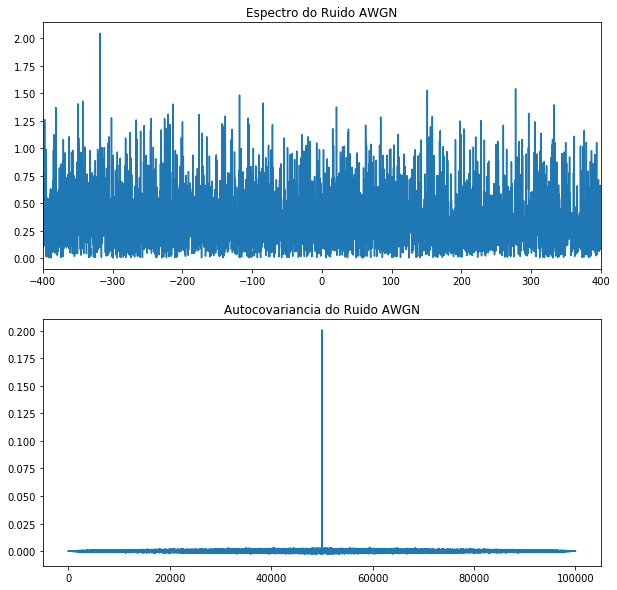

In [3]:
#Espectro
lfft=len(n)                                       
x=fftshift(fft(n,lfft)/lfft)                      
Fs = 10000
freq = np.arange(-Fs/2,Fs/2,Fs/lfft)
AutCov=np.correlate(n,n,'full')/len(n)             

#Graficos
plt.figure(1,[10,10])
plt.subplot(211)
plt.plot(freq,np.abs(n))
plt.xlim([-400,400])
plt.title("Espectro do Ruido AWGN")
plt.subplot(212)
plt.plot(AutCov)
plt.title("Autocovariancia do Ruido AWGN")
plt.show()

Matlab

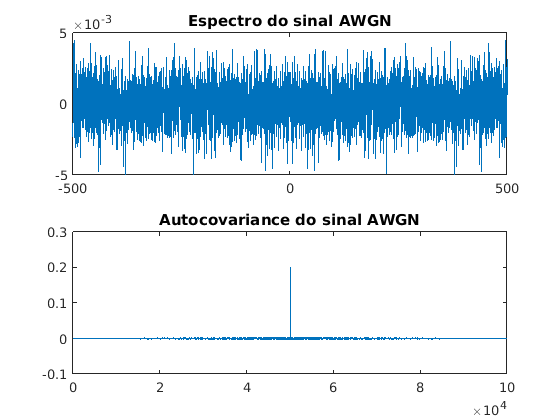

In [5]:
clc;clear all;close all;
% Parâmetros
SNR_dB = 10;                              % Determina o valor da SNR em dB
t = 0:0.0001:5;                           % Eixo do tempo
A = 2;                                    % Amplitude do sinal de entrada x(t)
x=A*cos(2*pi*10*t);                       % Sinal qualquer x(t)

%Geração manual das amostras de ruído 
N = length(x);                            % Calcula o comprimento de x
Ps = sum(abs(x).^2)/N;                    % Calcula a potência do sinal
SNR = 10^(SNR_dB/10);                     % Calcula a SNR linear
Pn = Ps/SNR;                              % Calcula a potência do ruído
noiseSigma = sqrt(Pn);                    % Desvio padrão do ruído AWGN (amostras reais)
n = noiseSigma* randn(1,N);               % Vetor do ruído 

%Audio
p = audioplayer(n,10000);               % Reproduzir o sinal gerado
play(p);                                  % Reproduzir o sinal gerado
pause(1)

%Espectro
lfft=length(n);
M_f=fftshift(fft(n,lfft)/lfft);
fs=10000;
freq=-fs/2:fs/lfft:fs/2-fs/lfft;
AutCov=xcorr(n,'biased');

%Graficos
subplot(2,1,1);
plot(freq,M_f);
title('Espectro do sinal AWGN');
xlim([-500,500]);
ylim([-5e-3,5e-3])
subplot(2,1,2);
plot(AutCov);
xlim([0 10e4])
title('Autocovariance do sinal AWGN')



### Espectro e autovariance normalizada

Bem, como esperado, o espectro do ruido AWGN possui componentes espectrais em todas as frequências. Já a autocovariância é praticamente zero em todo o espaço de tempo.

### Som reproduzido
O som gerado é o mesmo de quando estamos sintonizando uma estação de rádio, nas frequencias que não possuem a frequência de operação de uma estação de rádio, é emitido o som do ruido. 



## Passo 4.2

Python - Sinal Real

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal

s_real=loadmat('/home/victor/Downloads/Pratica_08_sinal_real.mat')
y=s_real['y'].flatten()
fs=s_real['fs'].flatten()
Am=s_real['Am'].flatten()
fm=s_real['fm'].flatten()

N=len(y) #Numero de elementos 
t=np.arange(0,N/fs,1/fs) #vetor t
x=Am*np.cos(2*np.pi*fm*t) #sinal original
n=y-x #ruido
# Estimação da SNR pelas amostras do sinal recebido
pTx = (np.linalg.norm(x)**2)/N                 # Potência do sinal x(t)
pNe = (np.linalg.norm(n)**2)/N                 # Potência estimada do ruído
SNR = pTx/pNe;                                # Estimação da SNR linear
SNR= 10*np.log10(SNR)                        # SNR em dB
#
# Mostrar informações
print('Estimação de SNR: ')
print('   SNR de entrada: {} dB'.format(SNR))



Estimação de SNR: 
   SNR de entrada: 15.043476623651998 dB


Python - Sinal Complexo

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal

s_com=loadmat('/home/victor/Downloads/Pratica_08_sinal_complexo.mat')
y=s_com['y'].flatten()
fs=s_com['fs'].flatten()
fm=s_com['fm'].flatten()
Ar=s_com['Ar'].flatten()
Ai=s_com['Ai'].flatten()

N=len(y) #Numero de elementos 
t=np.arange(0,N/fs,1/fs) #vetor t
x=Ar*np.cos(2*np.pi*fm*t)+1j*Ai*np.cos(2*np.pi*fm*t) #sinal original
n=y-x #ruido
# Estimação da SNR pelas amostras do sinal recebido
pTx = (np.linalg.norm(x)**2)/N                 # Potência do sinal x(t)
pNe = (np.linalg.norm(n)**2)/N                 # Potência estimada do ruído
SNR = pTx/pNe;                                # Estimação da SNR linear
SNR= 10*np.log10(SNR)                        # SNR em dB
#
# Mostrar informações
print('Estimação de SNR: ')
print('   SNR de entrada: {} dB'.format(SNR))


Estimação de SNR: 
   SNR de entrada: 10.03838014781276 dB


Matlab - Sinal Real

In [6]:
clc;clear all;close all;
load('/home/victor/Downloads/Pratica_08_sinal_real.mat');
N = length(y);
t = 0:(1/fs):(N*1/fs-1/fs);
x = Am*cos(2*pi*fm*t);

n = y-x;

% Estimação da SNR pelas amostras do sinal recebido
pTx = sum(abs(x.^2))/N;                      % Potência do sinal x(t).
pNe = sum(abs(n.^2))/N;                     % Potência estimada do ruído
SNR = pTx/pNe;                              % Estimação da SNR linear
SNR= 10*log10(SNR);                        % SNR em dB

% Mostrar informações
disp('Estimação de SNR: ')
%disp(['   SNR de entrada: ' num2str(SNR_dB) ' dB']);
disp(['   SNR de entrada: ' num2str(SNR) ' dB'])

Estimação de SNR: 
   SNR de entrada: 15.0435 dB


Matlab - Sinal Complexo

In [5]:
clc;clear all;close all;
load('/home/victor/Downloads/Pratica_08_sinal_complexo.mat');
N = length(y);
t = 0:(1/fs):(N*1/fs-1/fs);
x = Ar*cos(2*pi*fm*t)+j*Ai*cos(2*pi*fm*t);

n = y-x;

% Estimação da SNR pelas amostras do sinal recebido
pTx = sum(abs(x.^2))/N;                      % Potência do sinal x(t).
pNe = sum(abs(n.^2))/N;                     % Potência estimada do ruído
SNR = pTx/pNe;                              % Estimação da SNR linear
SNR= 10*log10(SNR);                        % SNR em dB

% Mostrar informações
disp('Estimação de SNR: ')
%disp(['   SNR de entrada: ' num2str(SNR_dB) ' dB']);
disp(['   SNR de entrada: ' num2str(SNR) ' dB']);

Estimação de SNR: 
   SNR de entrada: 10.0384 dB


## Passo 2.1
BPSK

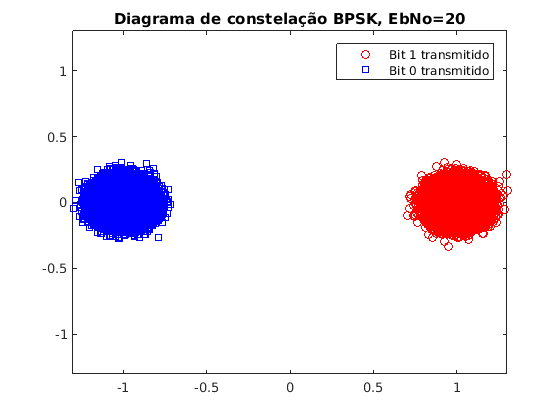

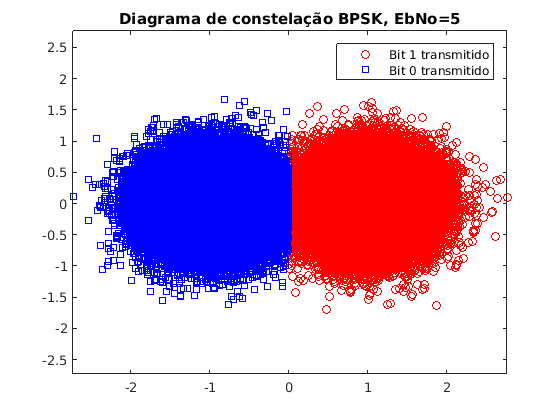

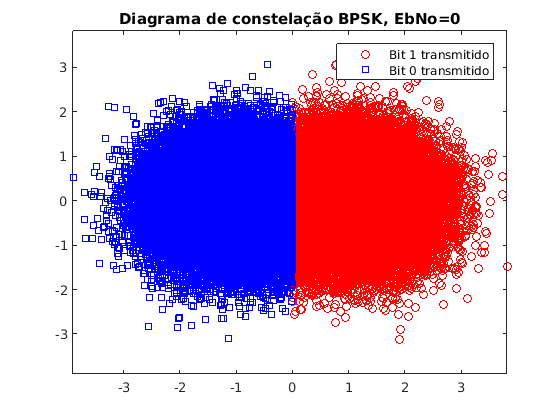

In [1]:
% Parâmetros
EbN0_dB = [0 5 20];                                          % Eb/N0 de entrada
Ns = 10^5;                                             % Número de símbolos simulados
% Sinal M-PSK gerado pela função pskmod
M = 2; 
bits2 = randi([0 M-1],Ns,1);                                                % Número de símbolo da modulação
for i=1:3
   
txSig = pskmod(bits2,M);
rxSig = awgn(txSig,EbN0_dB(i));
% Gráficos
figure
plot(rxSig(find(real(rxSig)>0)),'ro');
hold on;
plot(rxSig(find(real(rxSig)<=0)),'bs')
title(['Diagrama de constelação BPSK, EbNo=' num2str(EbN0_dB(i))]);
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig)' imag(rxSig)']);
maxAx = max([real(rxSig)' imag(rxSig)']);
axis([minAx maxAx minAx maxAx]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];

end

8-PSK

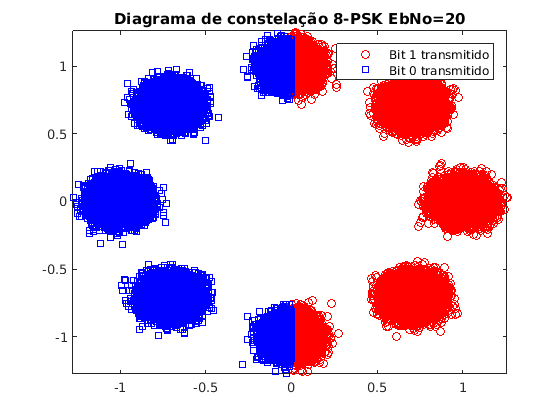

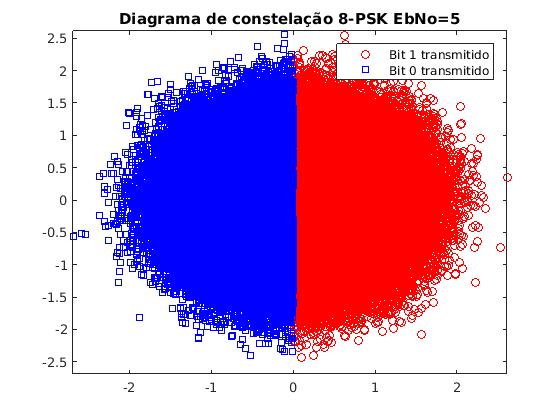

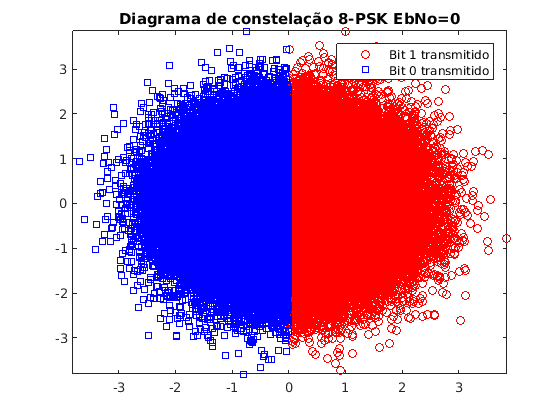

In [2]:
clear all
close all
% Parâmetros
EbN0_dB = [0 5 20];  
Ns = 10^5;                                             % Número de símbolos simulados
% Sinal M-PSK gerado pela função pskmod
M = 8; 
    bits2 = randi([0 M-1],Ns,1);% Eb/N0 de entrada
                                                % Número de símbolo da modulação
for i=1:length(EbN0_dB)
    
txSig = pskmod(bits2,M);
rxSig = awgn(txSig,EbN0_dB(i));
% Gráficos
figure
plot(rxSig(find(real(rxSig)>0)),'ro');
hold on;
plot(rxSig(find(real(rxSig)<=0)),'bs')
title(['Diagrama de constelação 8-PSK EbNo=' num2str(EbN0_dB(i))]);
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig)' imag(rxSig)']);
maxAx = max([real(rxSig)' imag(rxSig)']);
axis([minAx maxAx minAx maxAx]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];

end

BPSK e 8-PSK com EbN0 = 5dB

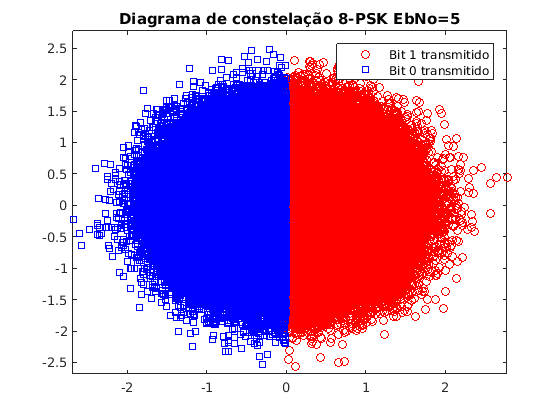

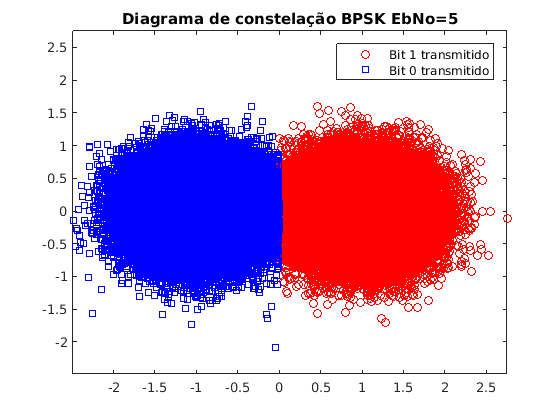

In [3]:
clear all
close all
% Parâmetros
EbN0_dB = 5;  
Ns = 10^5;                                             % Número de símbolos simulados
% Sinal M-PSK gerado pela função pskmod
M = [2 8]; 
    
                                                % Número de símbolo da modulação
for i=1:length(M)
bits2 = randi([0 M(i)-1],Ns,1);% Eb/N0 de entrada    
txSig = pskmod(bits2,M(i));
rxSig = awgn(txSig,EbN0_dB);
% Gráficos
figure
plot(rxSig(find(real(rxSig)>0)),'ro');
hold on;
plot(rxSig(find(real(rxSig)<=0)),'bs')

if M(i)==2
    title(['Diagrama de constelação BPSK EbNo=' num2str(EbN0_dB)]);
else
    title(['Diagrama de constelação 8-PSK EbNo=' num2str(EbN0_dB)]); 
end
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig)' imag(rxSig)']);
maxAx = max([real(rxSig)' imag(rxSig)']);
axis([minAx maxAx minAx maxAx]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];

end

### BPSK
Ao variar o Eb/No no BPSK, podemos ver que o efeito do ruido no desempenho do modulador digital. Assim, para 0dB, quase metade dos bits transmitidos se sobrepoem, para 5dB já há uma separação, mas não muito, já para 20dB aí sim, os sinais transmitidos estão bem separados, o que facilitará a detecnção dos mesmos no receptor. 

### 8-PSK
Para o 8-PSK, notamos que quase não há variação para um Eb/No de 0dB e 5dB, só realmente notamos a diferença com 20dB, e mesmo assim, em dois sinais ainda há sobreposição dos bits trasmitidos.

### BPSK vs 8-PSK para Eb/No = 5dB
Aqui fica claro que para um Eb/No baixo, o BPSK se comporta ligeiramente melhor do que o 8-PSK. 